# Energia nuclear
La física nuclear és un dels camps de la ciència més complicats. No es poden fer equacions senzilles, ja que intervenen un nombre considerable de cossos (el problema de tres cossos ja és complicat, imagineu-vos un nucli amb 50 protons i neutrons), però insufucient per utilitzar mètodes estadístics, tal com es fa a la Termodinàmica.   
No és estrany, per tant, trobar en el seu estudi a físics tan notables com Marie Curie, Yukawa, Weizsäcker, Gamow o Bohr. 

## El model del a gota líquida
> El model de la gota líquida és un model de física nuclear que tracta el nucli atòmic com una gota de fluid nuclear incompressible. Aquest fluid estaria compost per nucleons (protons i neutrons), que romanen units a causa de la força nuclear forta. Va ser proposat per primera vegada per George Gamow i posteriorment desenvolupar per Niels Bohr i John Archibald Wheeler. Aquest model no explica totes les propietats del nucli, però sí la seva forma esfèrica. A més ajuda en la predicció de l'energia de lligadura dels nuclis.  

*Col·laboradors de la Viquipèdia. Fórmula de Weizsäcker [en línia]. Viquipèdia, l'Enciclopèdia Lliure, 2020 [data de consulta: 18 de juliol del 2020]. Disponible en http://ca.wikipedia.org/w/index.php?title=F%C3%B3rmula_de_Weizs%C3%A4cker&oldid=24142630.* 

## La fórmula de masses

El físic alemany Carl Friedrich von Weizsäcker va confeccionar una fòrmula semiempírica de l'energia nuclear de lligam per a cada nucli segons el nombre de protons (Z), de neutrons (N) i de nucleons (A), suma de protons i neutrons, que conté. La fòrmula és semiempírica ja que, si bé la seva estructura té un raonament basat en les diferents interaccions entre els nucleons (protons i neutrons), els coeficients de cada terme son una estimació a partir de les dades experimentals de diferents nuclis.

$E/A=a -b/A^{1/3} -c Z^2/A^{4/3} -d (N-Z)^2/A^2 \pm \frac{e}{A^{7/4}}$

* El terme $a$ respon a l'energia de volum
* El terme $-b/A^{1/3}$ respon a la tensió superficial
* El terme $-cZ^{2}/A^{4/3}$ respon a la repulsió electrostàtica de Coulomb
* El terme $-d(N-Z)^{2}/A^{2}$ respon a la simetria neutrons/protons
* El terme $\pm \frac{e}{A^{7/4}}$ respon a la paritat (+ per valors parells, - per a senars)

Amb aquesta fórmula és fàcil deduir que l'energia per nucleó és més òptima per al ferro, de forma que si donem la suficient energia d'activació (col·lisió de nuclis lleugers, bombardeig amb neutrons de nuclis pesants) tant els nuclis més lleugers com més pesants poden patir reaccions nuclears que els portin cap a l'estructura nuclear del ferro. De fet, a les estrelles es produeixen reaccions de fusió des de nuclis lleugers cap al ferro. Una vegada que tots els nuclis són de ferro, si la massa a l'estrella supera el Límit de Chandrasekhar aquesta pot transformar-se amb el col·lapse gravitacional en una estrella de neutrons o un forat negre, després de patir una explosió de supernova en el seu col·lapse, moment en que s'alliberen molts dels elements que coneixem i dels que estem fets. Som *pols d'estels*, literalment.

## Anàlisis de dades experimentals
Podem accedir a gran quantitat de dades experimentals (i d'altres estimades per extrapolació) a http://amdc.impcas.ac.cn/web/nubase_en.html   
Jo he utilitzat les mateixes dades que la Wikipedia (https://commons.wikimedia.org/wiki/File_talk:Binding_energy_curve_-_common_isotopes.svg), que utilitza l'energia de lligam per nucleó d'una selecció dels isòtops més abundants de les dades calculades a https://web.archive.org/web/20171024000626/http://www.einstein-online.info/spotlights/binding_energy?set_language=en sobre les dades disponibles al 2003.  

In [1]:
%matplotlib inline
import numpy as np                        # imports the numpy package and creates the alias np for broader control of vector arrays
import pandas as pd                       # imports the pandas package and creates the alias pd to work with data tables and lists              
import matplotlib.pyplot as plt           # imports the matplotlib.pyplot package and creates the alias plt for plotting superiority

In [3]:
df = pd.read_csv('data/Energia/bindingEnergyIsotopicAbundanceSelected.csv')
df

,Nom,Ebpn [MeV],A
0,1H,0.000,1
1,2H,1.112,2
2,3H,2.827,3
3,3He,2.573,3
4,4He,7.074,4
...,...,...,...
139,227Ac,7.651,227
140,231Pa,7.618,231
141,232Th,7.615,232
142,235U,7.591,235


Trobarem un màxim d'aquesta energia per nucleó:

In [4]:
df['Ebpn [MeV]'].max()

8.79

que correspon al $^{56}Fe$

In [5]:
df.loc[df['Ebpn [MeV]'].idxmax()]

Nom           56Fe
Ebpn [MeV]    8.79
A               56
Name: 32, dtype: object

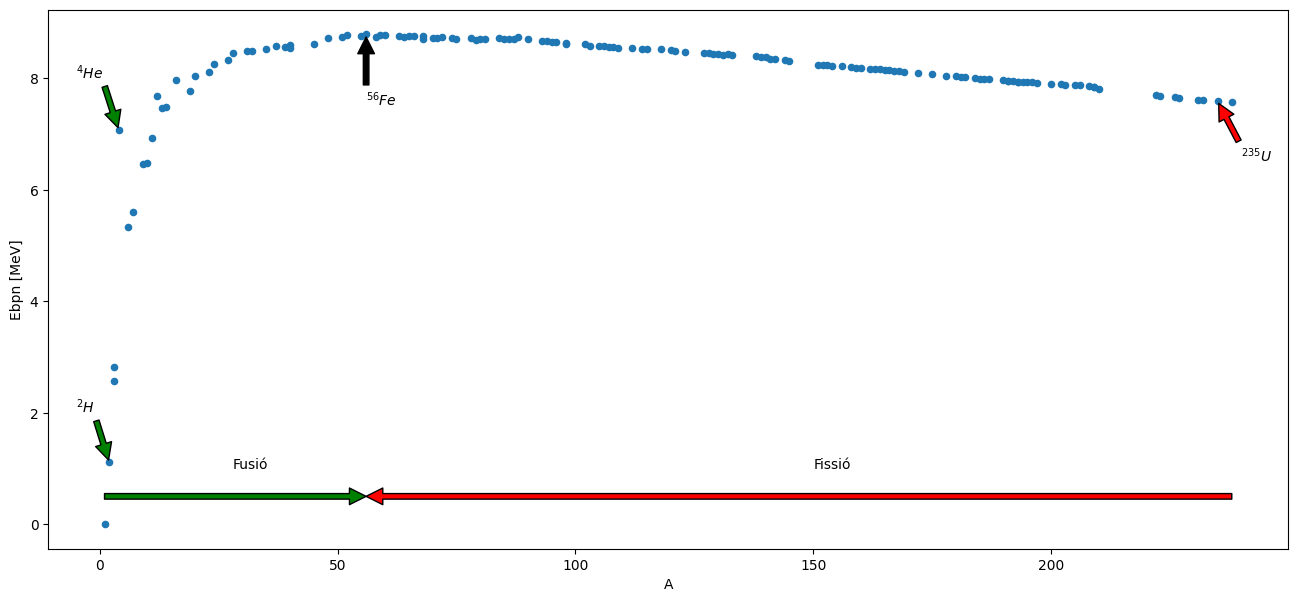

In [6]:
plt.rcParams['figure.figsize'] = (16,7) 
df.plot(kind='scatter',x='A',y='Ebpn [MeV]')
plt.annotate('$^{56}Fe$', xy=(56, 8.79), xytext=(56, 7.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.annotate('Fusió',xy=(28, 1))
plt.annotate('',xy=(56, 0.5), xytext=(1, 0.5),
             arrowprops=dict(facecolor='green'),
             )
plt.annotate('$^{2}H$', xy=(2, 1.11), xytext=(-5, 2),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )
plt.annotate('$^{4}He$', xy=(4, 7.07), xytext=(-5, 8),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )
plt.annotate('Fissió',xy=(150, 1))
plt.annotate('', xy=(56, 0.5), xytext=(238, 0.5),
             arrowprops=dict(facecolor='red'),
             )
plt.annotate('$^{235}U$', xy=(235, 7.59), xytext=(240, 6.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             );

Fixeu-vos el que comentava:
* Tenim un màxim de l'energia de lligam per nucleó al $^{56}Fe$
* Als elements a la seva esquerra els és favorable la fusió per incrementar l'energia de lligam per nucleó. És el procès que es realitza als estels
* Als elements a la seva dreta els és favorable la fissió per incrementar l'energia de lligam per nucleó.
* Fixeu-vos el salt entre $^{2}H$ (deuteri) i $^{4}He$. És molt més gran que l'energia que pot alliberar $^{235}U$ al fissionar-se en nuclis més lleugers